# ARCH Models
= Autoregressive Conditional Heteroskedasticity Model
- Consists of multiple equations (for *mean* and *variance*)
- Heteroscedasticity = "Different Dispersion" = no constant variance

## Conditional Variance
- $\sigma_t^2 = Var(y_t|y_{t-1}) = \alpha_0 + \alpha_1 \epsilon_{t-1}^2$
    - $\alpha_0 = constant$
    - $\alpha_1 = coefficient$
   
## Mean
- can be modelled as an ARMAX Model

# Volatility
- TS is often stationary





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')
import pickle

In [2]:
with open('data/spx_train.pickle', 'rb') as f:
    df = pickle.load(f)
df['returns'] = df['market_value'].pct_change()
df['sq_returns'] = df['returns']**2
df.head()

,market_value,returns,sq_returns
date,,,
1994-01-07,469.90,NaN,NaN
1994-01-10,475.27,0.011428,1.305983e-04
1994-01-11,474.13,-0.002399,5.753457e-06
1994-01-12,474.17,0.000084,7.117461e-09
1994-01-13,472.47,-0.003585,1.285375e-05


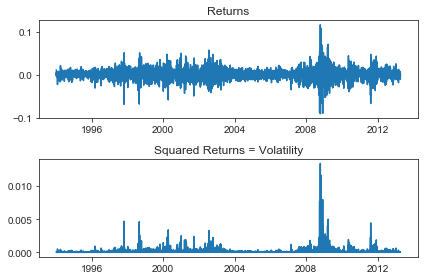

In [3]:
_, axes = plt.subplots(2,1)
axes[0].plot(df.returns)
axes[0].set_title('Returns')
axes[1].plot(df.sq_returns)
axes[1].set_title('Squared Returns = Volatility')
plt.tight_layout()

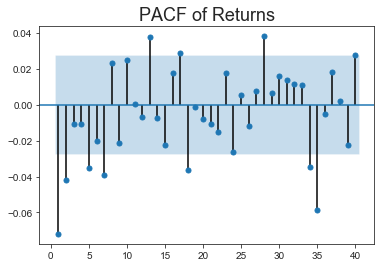

In [4]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_pacf(df.returns[1:], lags=40, zero=False)
plt.title("PACF of Returns", size=18)
plt.show()

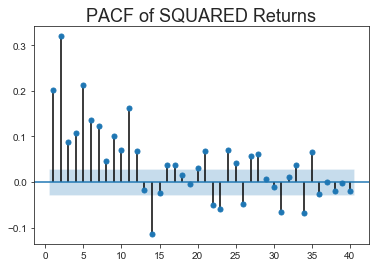

In [5]:
sgt.plot_pacf(df.sq_returns[1:], lags=40, zero=False)
plt.title("PACF of SQUARED Returns", size=18)
plt.show()


=> High partial autocorrelation for volatility



In [7]:
from arch import arch_model
model_arch1 = arch_model(df.returns[1:], mean='constant', vol='ARCH', p=1)
res_model_arch1 = model_arch1.fit()
res_model_arch1.summary()



/Users/Moritz/anaconda3/envs/MoritzConda/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001464. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Iteration:      1,   Func. Count:      5,   Neg. LLF: -15268.56905413001
Iteration:      2,   Func. Count:     18,   Neg. LLF: -15269.111625729825
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -15269.111625140435
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:                15269.1
Distribution:                  Normal   AIC:                          -30532.2
Method:            Maximum Likelihood   BIC:                          -30512.7
                                        No. Observations:                 5020
Date:                Mon, Mar 30 2020   Df Residuals:                     5017
Time:                        11:35:44   Df Model:                            3
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.7303e-04  1.786e-04      2.648  8.098e-03 [1.229e-04,8.232e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.0983e-04  5.443e-06     20.178  1.535e-90 [9.916e-05,1.205e-04]
alpha[1]       0.2500  4.265e-02      5.862  4.574e-09     [  0.166,  0.334]
============================================================================

Covariance estimator: robust
"""

$R^2$ is zero as in a constant mean model there is no variance to explain!

In [8]:
model_arch2 = arch_model(df.returns[1:], mean='constant', vol='ARCH', p=2)
res_model_arch2 = model_arch2.fit()
res_model_arch2.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -15564.656457786343
Iteration:      2,   Func. Count:     20,   Neg. LLF: -15566.949511789495
Iteration:      3,   Func. Count:     34,   Neg. LLF: -15566.95288571364
Iteration:      4,   Func. Count:     46,   Neg. LLF: -15566.952964651664
Iteration:      5,   Func. Count:     58,   Neg. LLF: -15566.9531301497
Iteration:      6,   Func. Count:     72,   Neg. LLF: -15566.95360258898
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -15566.953621093438
            Iterations: 8
            Function evaluations: 80
            Gradient evaluations: 6


/Users/Moritz/anaconda3/envs/MoritzConda/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001464. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:                15567.0
Distribution:                  Normal   AIC:                          -31125.9
Method:            Maximum Likelihood   BIC:                          -31099.8
                                        No. Observations:                 5020
Date:                Mon, Mar 30 2020   Df Residuals:                     5016
Time:                        11:52:01   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         6.0788e-04  1.606e-04      3.785  1.538e-04 [2.931e-04,9.227e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      7.3221e-05  3.599e-06     20.343  5.392e-92 [6.617e-05,8.028e-05]
alpha[1]       0.2500  4.606e-02      5.428  5.703e-08     [  0.160,  0.340]
alpha[2]       0.2500  3.376e-02      7.404  1.318e-13     [  0.184,  0.316]
============================================================================

Covariance estimator: robust
"""

# GARCH Model
= Generalized ARCH Model
- extends variance equation of ARCH by past conditional variances
    - reason: volatility clustering (high vola follow high vola and low vola follows low vola)

    